In [1]:
import numpy as np

In [2]:
def ma(s):
    u = 0.5*np.tanh(15*(s-0.5)) + 0.5
    return u 

ma(0.5)
np.square(3)

9

In [3]:
np.sin(90*np.pi/180)

1.0

In [4]:
M = np.zeros((3,3),dtype=float)
C = np.zeros((3,3),dtype=float)
G = np.zeros(3,dtype=float)

th1 = 0 *np.pi /180
th2 = -10 *np.pi/180
th3 = -10 *np.pi/180

thd1 = 0 
thd2 = 0 
thd3 = 0

i1 = 0.133
l1 = 0.383
a1 = 0.383 * 0.42
m1 = 6.86

i2 =0.048
l2 = 0.407
a2 = 0.407*0.41
m2 = 2.76

i3 = 0.004
l3 = 0.149
a3 = 0.149 * 0.4
m3 = 0.89

g=9.8

In [5]:
import numpy as np

def dynamics_equations(state, t):
    
    # Given constants
    g1 = 9.81  # acceleration due to gravity

    # Equations of motion
    m11 = I1 + m1 * a1**2 + I2 + m2 * (l1**2 + a2**2 + 2 * l1 * a2 * np.cos(theta2)) + I3 + m3 * (
            l1**2 + l2**2 + a3**2 + 2 * l1 * l2 * np.cos(theta2) + 2 * l2 * a3 * np.cos(theta3) +
            2 * l1 * a3 * np.cos(theta3 - theta2))

    m12 = -I2 - m2 * (a2**2 + l1 * a2 * np.cos(theta2)) - I3 - m3 * (
            l2**2 - a3**2 - l1 * l2 * np.cos(theta2) - 2 * l2 * a3 * np.cos(theta3) - l1 * a3 * np.cos(theta3 - theta2))

    m13 = I3 + m3 * (a3**2 - l2 * a3 * np.cos(theta3) + l1 * a3 * np.cos(theta3 - theta2))

    m21 = -I2 - m2 * (a2**2 + l1 * a2 * np.cos(theta2)) - I3 - m3 * (
            l2**2 + a3**2 + l1 * l2 * np.cos(theta2) + 2 * l2 * a3 * np.cos(theta3) + l1 * a3 * np.cos(theta3 - theta2))

    m22 = I2 + m2 * a2**2 + I3 + m3 * (l2**2 + a3**2 + 2 * l2 * a3 * np.cos(theta3))

    m23 = -I3 - m3 * (a3**2 + l2 * a3 * np.cos(theta3))

    m31 = I3 + m3 * (a3**2 + l2 * a3 * np.cos(theta3) + l1 * a3 * np.cos(theta3 - theta2))

    m32 = -I3 - m3 * (a3**2 + l2 * a3 * np.cos(theta3))

    m33 = I3 + m3 * a3**2

    # Coriolis and centrifugal terms
    c11 = 0
    c12 = 0
    c13 = 0

    c21 = -m2 * l1 * a2 * thetadot1 * np.sin(theta2) - m3 * l1 * l2 * thetadot1 * np.sin(theta2) + m3 * l1 * a3 * thetadot1 * np.sin(theta3 - theta2)
    c22 = m2 * l1 * a2 * thetadot1 * np.sin(theta2) + m3 * l1 * a3 * thetadot1 * np.sin(theta3 - theta2) + m3 * l1 * l2 * thetadot1 * np.sin(theta2)
    c23 = m3 * l1 * a3 * thetadot1 * np.sin(theta3 - theta2)

    c31 = m2 * l2 * a3 * (2 * thetadot2 - thetadot1) * np.sin(theta3) - m3 * l1 * a3 * thetadot1 * np.sin(theta3 - theta2)
    c32 = -m2 * l2 * a3 * thetadot2 * np.sin(theta3) + m3 * l1 * a3 * thetadot1 * np.sin(theta3 - theta2)
    c33 = m2 * l2 * a3 * (thetadot2 - thetadot1) * np.sin(theta3) - m3 * l1 * a3 * thetadot1 * np.sin(theta3 - theta2)

    # Gravity terms
    gra1 = m1 * g1 * a1 * np.sin(theta1) + m2 * g1 * (l1 * np.sin(theta1) - a2 * np.sin(theta2 - theta1)) + \
           m3 * g1 * (l1 * np.sin(theta1) - l2 * np.sin(theta2 - theta1) + a3 * np.sin(theta1 - theta2 + theta3))

    gra2 = m2 * g1 * a2 * np.sin(theta2 - theta1) + m3 * g1 * (l2 * np.sin(theta2 - theta1) - a3 * np.sin(theta1 - theta2 + theta3))

    gra3 = m3 * g1 * a3 * np.sin(theta1 - theta2 + theta3)

    # Assemble the mass matrix, Coriolis/centrifugal matrix, and gravity vector
    M = np.array([[m11, m12, m13],
                  [m21, m22, m23],
                  [m31, m32, m33]])

    C = np.array([[c11, c12, c13],
                  [c21, c22, c23],
                  [c31, c32, c33]])

    G = np.array([gra1, gra2, gra3])

    # Compute the joint accelerations
    thetaddot = np.linalg.solve(M, -C @ np.array([thetadot1, thetadot2, thetadot3]) - G)

    return [thetadot1, thetadot2, thetadot3, thetaddot[0], thetaddot[1], thetaddot[2]]

# Initial conditions
initial_state = [0, 0, 0, 0, 0, 0]  # Example initial conditions

# Time vector
time = np.linspace(0, 10, 1000)  # Example time vector

# Solve the equations


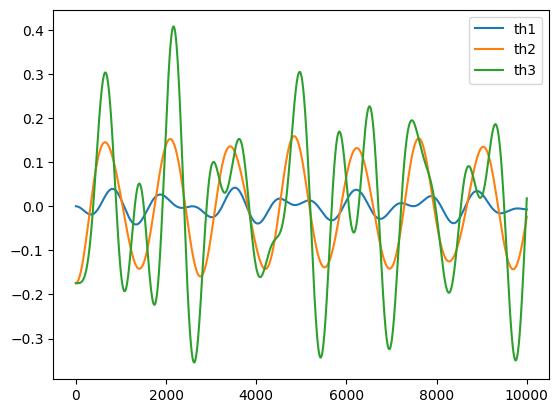

In [7]:
t = 0
t2 = 0
dt = 0.001
t1 = []
t2 = []
t3 = []
for i in range(10000):  
    k11 = (0.5*dt) * ttd1(th1,thd1)
    k12 = (0.5*dt) * ttd2(th2,thd2)
    k13 = (0.5*dt) * ttd3(th3,thd3)

    k21 = (0.5*dt) * ttd1(th1+(0.5*dt*(thd1+(k11*0.5))),thd1+k11)
    k22 = (0.5*dt) * ttd2(th2+(0.5*dt*(thd2+(k12*0.5))),thd2+k12)
    k23 = (0.5*dt) * ttd3(th3+(0.5*dt*(thd3+(k13*0.5))),thd3+k13)

    k31 = (0.5*dt) * ttd1(th1+(0.5*dt*(thd1+(k11*0.5))),thd1+k21)
    k32 = (0.5*dt) * ttd2(th2+(0.5*dt*(thd2+(k12*0.5))),thd2+k22)
    k33 = (0.5*dt) * ttd3(th3+(0.5*dt*(thd3+(k13*0.5))),thd3+k23)

    k41 = (0.5*dt) * ttd1(th1+(dt*(thd1+(k11))),thd1+(2*k31))    
    k42 = (0.5*dt) * ttd2(th2+(dt*(thd2+(k12))),thd2+(2*k32))    
    k43 = (0.5*dt) * ttd3(th3+(dt*(thd3+(k13))),thd3+(2*k33))

    thd1 += (k11+(2*k21)+(2*k31)+k41)/3
    thd2 += (k12+(2*k22)+(2*k32)+k42)/3
    thd3 += (k13+(2*k23)+(2*k33)+k43)/3

    th1 += dt*(thd1+((k11+k21+k31)/3))
    th2 += dt*(thd2+((k12+k22+k32)/3))
    th3 += dt*(thd3+((k13+k23+k33)/3))

    t1.append(th1)
    t2.append(th2)
    t3.append(th3)

asa = np.arange(10000)

import matplotlib.pyplot as plt

plt.plot(asa,t1,label="th1")
plt.plot(asa,t2,label="th2")
plt.plot(asa,t3,label="th3")
plt.legend()

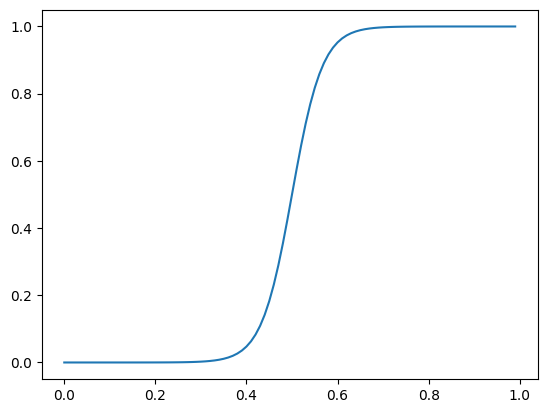

In [8]:
def u(s):
    u = 0.5*np.tanh(15*(s-0.5)) + 0.5
    return u 

uu = []
for i in range(100):
    a = i/100
    uu.append(u(a))

asa = np.arange(100) / 100
plt.plot(asa,uu)
